## Usage examples for `py.ciu.image` package

This code block contains all the `pip install`s that were executed when starting with a (more or less) empty environment. Included mainly FYI. 

In [3]:
# Take care of all requirements. Comment away these if you have already installed as it should already!
!python3 -m pip install --upgrade pip
!pip install pandas
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow
!pip install scikit-image

  Using cached pip-23.3-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 40.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 7.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 29.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 42.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00a 0:0

### Detecting bleeding in gastro-enterological images

Short example that takes pre-trained model, runs CIU on an image instance and then plots the original image and the image where only superpixels with bleeding detected are shown.

2023-10-16 15:04:42.647276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done in 0.7676 seconds


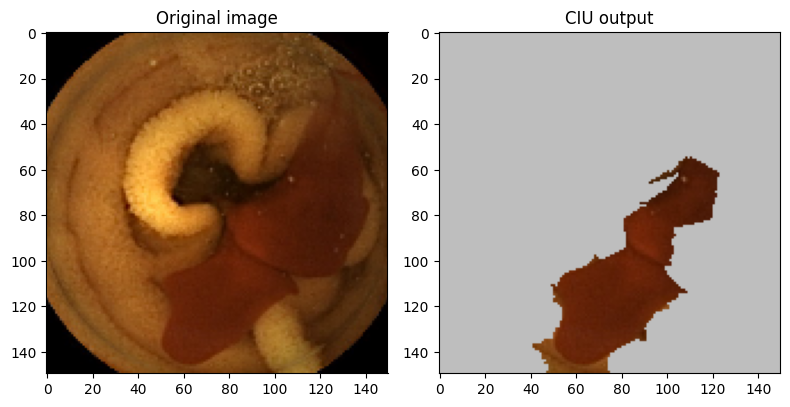

In [4]:
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from CIU import CIU

model = tf.keras.models.load_model("model_full_categorical.h5")
image_path = "Set1_674.png"
out_names = ["NonBleeding", "Bleeding"]

ciu_object = CIU(model, out_names, image_path, (150, 150), True)

# Get original image, scaled/manipulated properly
img = CIU.image(ciu_object)

tic = time.perf_counter()
image_output = ciu_object.CIU_Explanation()
toc = time.perf_counter()
print(f"Done in {toc - tic:0.4f} seconds")

#plt.imshow(image_output)
#plt.show()

# Create a grid of images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
axes[0].imshow(img[0])
axes[0].set_title('Original image')
axes[1].imshow(image_output)
axes[1].set_title('CIU output')
plt.tight_layout() # Adjust spacing between images
plt.show()


Get the segments/superpixels and plot their borders.

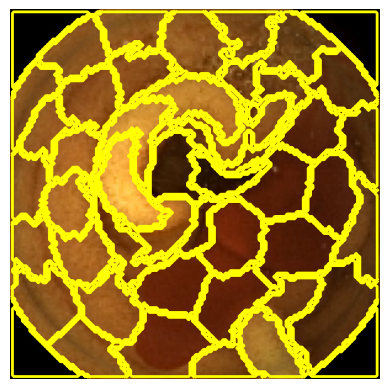

In [6]:
from scipy import ndimage
import numpy as np

# Get the segments
segments = ciu_object.segmented(img[0])
num_segments = np.amax(segments)

# Define the colors for segment borders (you can customize these)
border_color = 'yellow'
border_width = 2

# Plot the original image
plt.imshow(img[0])

# Loop through the labeled segments and plot borders
for i in range(0, num_segments + 1):
    segment_mask = (segments == i)
    border_mask = np.logical_xor(segment_mask, ndimage.binary_erosion(segment_mask))
    plt.contour(border_mask, colors=border_color, linewidths=border_width)

plt.axis('off')
plt.show()